In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [43]:
#  loading the data
data=np.load('./data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [44]:
X=data['arr_0']
Y=data['arr_1']
mean=data['arr_2']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,stratify=Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9896, 50), (2475, 50), (9896,), (2475,))

# Training a machine learning model

In [5]:
from sklearn.svm import SVC

model=SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)

In [7]:
model.fit(x_train,y_train)
print('model trained sucessfully')

model trained sucessfully


In [8]:
# score
model.score(x_train,y_train)

0.930375909458367

In [9]:
#score
model.score(x_test,y_test)

0.8973737373737374

# we can see that above result is good but we can apply model evaluation and hyper parameter tuning for improvement of model

# model evaluation
- confusion matrix
- classification report
- kappa score
- ROC and AUC(probablity)

In [10]:
from sklearn import metrics

In [11]:
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

In [12]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm=np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm=np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)

In [13]:
 cm

array([[1091,  117, 1208],
       [ 137, 1130, 1267],
       [1228, 1247, 2475]], dtype=int64)

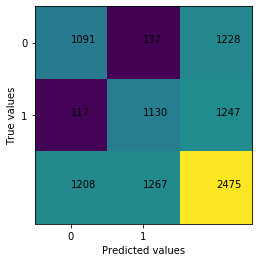

In [14]:
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()

In [15]:
# classification report
cr=metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,f1-score,precision,recall,support
male,0.895731,0.888436,0.903146,1208.000000
female,0.898966,0.906175,0.891871,1267.000000
accuracy,0.897374,0.897374,0.897374,0.897374
macro avg,0.897348,0.897306,0.897508,2475.000000
weighted avg,0.897387,0.897517,0.897374,2475.000000


In [16]:
# kappa score : it talk about random accuracy
# if kappa score>=20 and <40worst model
# if kappa score>=40 and <60 poor model
# if kappa score<=60 and <80  good model
# if kappa score>=80 perfect  model
metrics.cohen_kappa_score(y_test,y_pred)

0.7947099063042493

#  ROC AND AUC

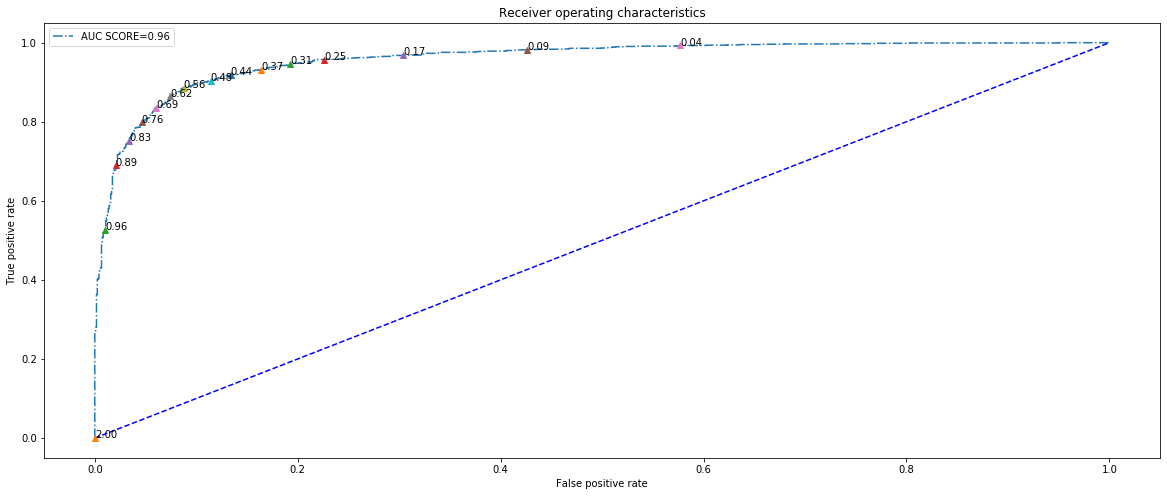

In [17]:
# roc for female
fpr,tpr,thresh=metrics.roc_curve(y_test,y_prob[:,1])
auc_s=metrics.auc(fpr,tpr)
plt.figure(figsize=(20,8))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),25):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
plt.legend(['AUC SCORE=%0.2f'%auc_s])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristics')
plt.show()

# Already our model is doing well but let hyper tune the parameter and anlyse the result
# Hyper parameter tuning

In [18]:
model_tune=SVC()

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid={'C':[1,10,20,30,50,100],
            'kernel':['rbf','poly'],
           'gamma':[0.1,0.05,0.01,0.001,0.005],
           'coef0':[0,1],
           }


In [21]:
model_grid=GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=1)

In [22]:
model_grid.fit(X,Y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 78.6min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [23]:
model_grid.best_index_

2

In [24]:
model_grid.best_estimator_

SVC(C=1, coef0=0, gamma=0.05)

In [25]:
model_grid.best_score_

0.9106785559720079

In [28]:
# with best parameters build ml model
model_best=SVC(C=1,kernel='rbf',gamma=0.05,probability=True)

In [29]:
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.9094949494949495

In [30]:
y_pred=model_best.predict(x_test)
y_prob=model_best.predict_proba(x_test)

In [31]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm=np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm=np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)

In [32]:
 cm

array([[1108,  100, 1208],
       [ 124, 1143, 1267],
       [1232, 1243, 2475]], dtype=int64)

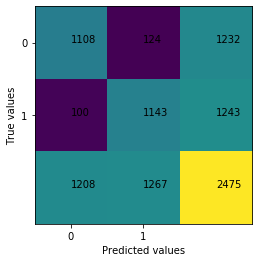

In [33]:
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()

In [34]:
# classification report
cr=metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,f1-score,precision,recall,support
male,0.908197,0.899351,0.917219,1208.000000
female,0.910757,0.919549,0.902131,1267.000000
accuracy,0.909495,0.909495,0.909495,0.909495
macro avg,0.909477,0.909450,0.909675,2475.000000
weighted avg,0.909507,0.909691,0.909495,2475.000000


In [35]:
# kappa score : it talk about random accuracy
# if kappa score>=20 and <40worst model
# if kappa score>=40 and <60 poor model
# if kappa score<=60 and <80  good model
# if kappa score>=80 perfect  model
metrics.cohen_kappa_score(y_test,y_pred)

0.818970719232206

#  ROC AND AUC

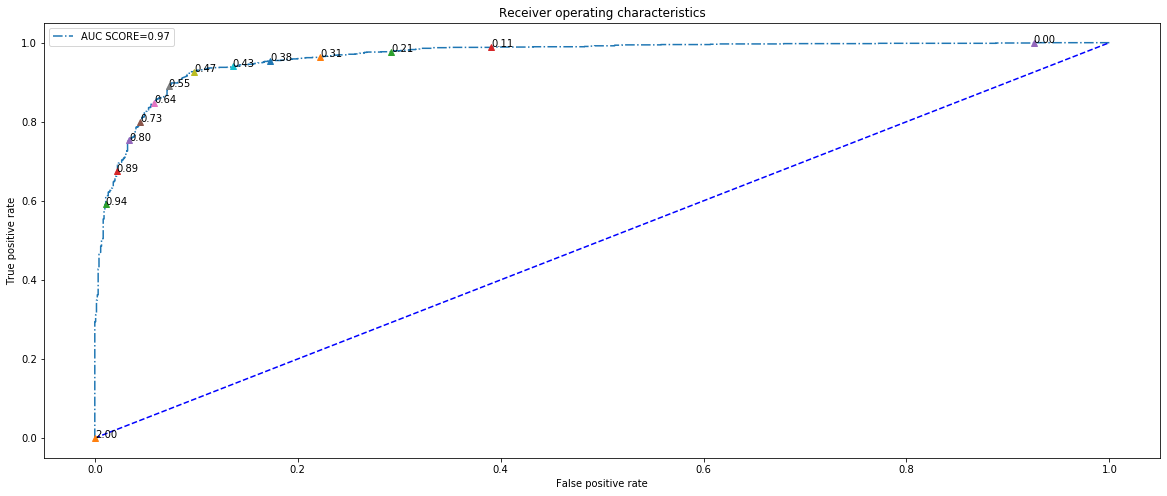

In [36]:
# roc for female
fpr,tpr,thresh=metrics.roc_curve(y_test,y_prob[:,1])
auc_s=metrics.auc(fpr,tpr)
plt.figure(figsize=(20,8))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),25):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
plt.legend(['AUC SCORE=%0.2f'%auc_s])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristics')
plt.show()

In [40]:
# save our best model
import pickle
pickle.dump(model_best,open('./model/model_svm.pickle','wb'))

In [45]:
pickle.dump(mean,open('./model/mean_preprocess.pickle','wb'))

In [42]:
mean

array(0.52812797)